In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stat

In [2]:
df = pd.read_csv(r"D:\zomato.csv")
pd.set_option("display.max_columns", None)
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
#to check the no. of columns
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [4]:
 # drop the unnecessary columns from the dataset
df = df.drop(['url','address','phone','menu_item','listed_in(city)','reviews_list'],axis = 1)
df.head(2)

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet


In [5]:
df.shape

(51717, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   dish_liked                   23639 non-null  object
 8   cuisines                     51672 non-null  object
 9   approx_cost(for two people)  51371 non-null  object
 10  listed_in(type)              51717 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.3+ MB


**DATA CLEANING**

In [7]:
#to check the null value (True as null and Flase as notnull)
df.isna().sum()

name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
listed_in(type)                    0
dtype: int64

In [8]:
# Calcualting the missing percentage
missing_percentage = df.isna().sum().sort_values(ascending = False) / len(df)
missing_percentage

dish_liked                     0.542916
rate                           0.150337
approx_cost(for two people)    0.006690
rest_type                      0.004389
cuisines                       0.000870
location                       0.000406
name                           0.000000
online_order                   0.000000
book_table                     0.000000
votes                          0.000000
listed_in(type)                0.000000
dtype: float64

<Axes: >

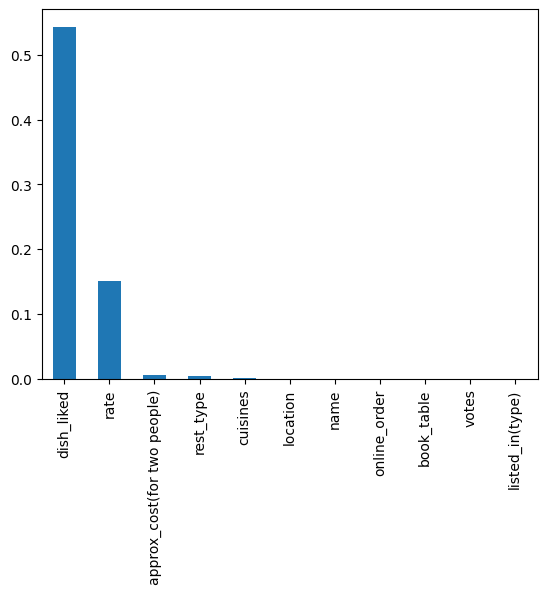

In [9]:
missing_percentage.plot(kind = 'bar')

In [10]:
missing_percentage[missing_percentage != 0]

dish_liked                     0.542916
rate                           0.150337
approx_cost(for two people)    0.006690
rest_type                      0.004389
cuisines                       0.000870
location                       0.000406
dtype: float64

In [11]:
df.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [12]:
df.dropna(subset=['rate'],axis=0,inplace=True)

In [13]:
def split(x):
    return x.split('/')[0].strip()

In [14]:
df['rate'] = df['rate'].apply(split)

In [15]:
df['rate'].replace(['NEW','-'],0,inplace=True)

In [16]:
df['rate'] = df['rate'].astype(float)

In [17]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43942 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         43942 non-null  object 
 1   online_order                 43942 non-null  object 
 2   book_table                   43942 non-null  object 
 3   rate                         43942 non-null  float64
 4   votes                        43942 non-null  int64  
 5   location                     43942 non-null  object 
 6   rest_type                    43791 non-null  object 
 7   dish_liked                   23609 non-null  object 
 8   cuisines                     43931 non-null  object 
 9   approx_cost(for two people)  43690 non-null  object 
 10  listed_in(type)              43942 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.0+ MB


In [18]:
# to know the statistics summary
df.describe()

,rate,votes
count,43942.000000,43942.000000
mean,3.508698,333.430954
std,0.925639,862.180633
min,0.000000,0.000000
25%,3.300000,17.000000
50%,3.700000,64.000000
75%,4.000000,254.000000
max,4.900000,16832.000000


In [19]:
# to check how many numeric columns 
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_df = df.select_dtypes(include =numerics)
len(numeric_df.columns)

2

online_order
Yes    64.42
No     35.58
Name: proportion, dtype: float64


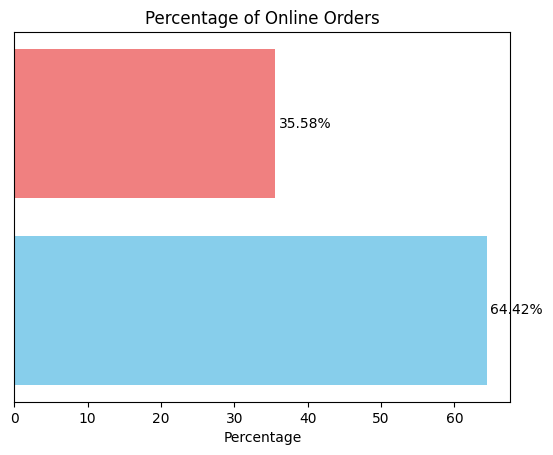

In [20]:
# Calculate the percentage of online orders
online_order_percentage = (df['online_order'].value_counts(normalize=True) * 100).round(2)
print(online_order_percentage)
labels = online_order_percentage.index.astype(str).to_list()
values = online_order_percentage.to_list()
colors = ['skyblue', 'lightcoral']
plt.barh(online_order_percentage.index.astype(str), online_order_percentage, color=colors)
for index, value in enumerate(online_order_percentage):
    plt.text(value + 0.5, index, f"{value}%", va='center')
plt.xlabel("Percentage")
plt.title("Percentage of Online Orders")
plt.yticks([])
plt.show()

In [21]:
#Percentage of restaurants in the dataset offer online ordering
online_order_percentage = (df['online_order'] == 'Yes').mean() * 100
print(f"Percentage: {online_order_percentage:.2f}% of restaurants offer online ordering")

Percentage: 64.42% of restaurants offer online ordering


**Interpretation:**  The percentage indicates the extent to which restaurants in the dataset have embraced online ordering, reflecting potential trends in the industry or region.
A high percentage suggests a strong customer preference for online ordering, which businesses might need to prioritize to remain competitive.
A low percentage could indicate potential gaps in the market for businesses to capitalize on by offering online ordering capabilities.
Businesses can use this information to identify and target restaurants that have not yet adopted online ordering, offering potential partnerships or solutions.

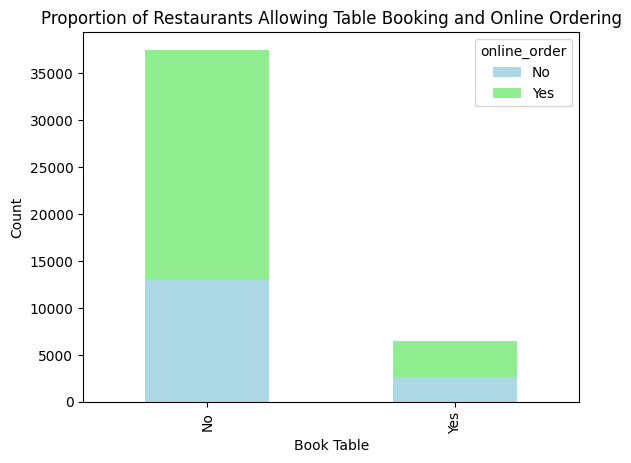

In [22]:
# Proportion of restaurants allowing table booking and online ordering
booking_order_proportion = df.groupby(['book_table', 'online_order']).size().unstack()
booking_order_proportion.plot(kind='bar', stacked=True, color=['lightblue', 'lightgreen'])
plt.title('Proportion of Restaurants Allowing Table Booking and Online Ordering')
plt.xlabel('Book Table')
plt.ylabel('Count')
plt.show()

In [23]:
# Group by 'location' and find the most preferred dish and order type
preferred_dish_order = df.groupby('location').agg({'dish_liked': pd.Series.mode, 'online_order': pd.Series.mode})

# Display the result
print("Most Preferred Dish and Order Type per Location:")
preferred_dish_order

Most Preferred Dish and Order Type per Location:


,dish_liked,online_order
location,,
BTM,Biryani,Yes
Banashankari,"Pasta, Gelato, Garlic Bread, Mojito, Nachos, P...",Yes
Banaswadi,Mutton Biryani,Yes
Bannerghatta Road,"Coffee, French Fries, Lemon Tea, Veg Sandwich",Yes
Basavanagudi,"[Masala Dosa, Pizza, Fries, Anjeer Ice Cream, ...",Yes
...,...,...
West Bangalore,"Sandwich, Salads, Pizza, Sandwiches, Salad, Pa...",No
Whitefield,Chicken Biryani,Yes
Wilson Garden,Friendly Staff,Yes


In [24]:
# Find the most liked dish per location
most_liked_dish = df.groupby('location')['dish_liked'].agg(lambda x: x.mode().iat[0] if not x.mode().empty else None).reset_index()

print("Most Liked Dish per Location:")
most_liked_dish

Most Liked Dish per Location:


,location,dish_liked
0,BTM,Biryani
1,Banashankari,"Pasta, Gelato, Garlic Bread, Mojito, Nachos, P..."
2,Banaswadi,Mutton Biryani
3,Bannerghatta Road,"Coffee, French Fries, Lemon Tea, Veg Sandwich"
4,Basavanagudi,Masala Dosa
...,...,...
87,West Bangalore,"Sandwich, Salads, Pizza, Sandwiches, Salad, Pa..."
88,Whitefield,Chicken Biryani
89,Wilson Garden,Friendly Staff
90,Yelahanka,"Appam, Fish Curry, Fish Fry, Pothichoru"


In [25]:
# Group by 'location' and find the most liked dish
most_liked_dish = df.groupby('location')['dish_liked'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None).reset_index()

print("Most Liked Dish per Location:")
most_liked_dish

Most Liked Dish per Location:


,location,dish_liked
0,BTM,Biryani
1,Banashankari,"Pasta, Gelato, Garlic Bread, Mojito, Nachos, P..."
2,Banaswadi,Mutton Biryani
3,Bannerghatta Road,"Coffee, French Fries, Lemon Tea, Veg Sandwich"
4,Basavanagudi,Masala Dosa
...,...,...
87,West Bangalore,"Sandwich, Salads, Pizza, Sandwiches, Salad, Pa..."
88,Whitefield,Chicken Biryani
89,Wilson Garden,Friendly Staff
90,Yelahanka,"Appam, Fish Curry, Fish Fry, Pothichoru"


In [26]:
most_rated_restaurant = df.groupby('dish_liked')['rate'].idxmax()
top_rated_restaurants = df.loc[most_rated_restaurant, ['dish_liked', 'name', 'rate']]

print("Most Rated Restaurant for Each Dish Liked:")
top_rated_restaurants

Most Rated Restaurant for Each Dish Liked:


,dish_liked,name,rate
19383,"Aam Panna, Pasta, Biryani, Paneer Tikka, Chine...",Fusion Theory,0.0
21036,"Aam Panna, Pasta, Chinese Bhel, Biryani, Panee...",Fusion Theory,4.1
2481,"Aam Panna, Pasta, Paneer Tikka, Biryani, Pav B...",Fusion Theory,0.0
1405,Afghan Chicken,Aramane Restaurant,2.9
1318,"Akki Rottis, Neer Dosa",Hotel Aradhana,3.7
...,...,...,...
4087,"Wood Fire Pizza, Cocktails, Ferrero Rocher Sha...",Baithak,4.2
15461,"Zinger Burger, Burgers, Popcorn Chicken",KFC,3.3
18859,"Zinger Burger, Crispy Chicken, Rice Bowl, Hot ...",KFC,3.1
40171,"Zinger Burger, French Fries, Choco Lash, Hot W...",KFC,4.0


**Distribution of rating**

C:\Users\DELL\AppData\Local\Temp\ipykernel_3168\2545713484.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['rate'])


<function matplotlib.pyplot.show(close=None, block=None)>

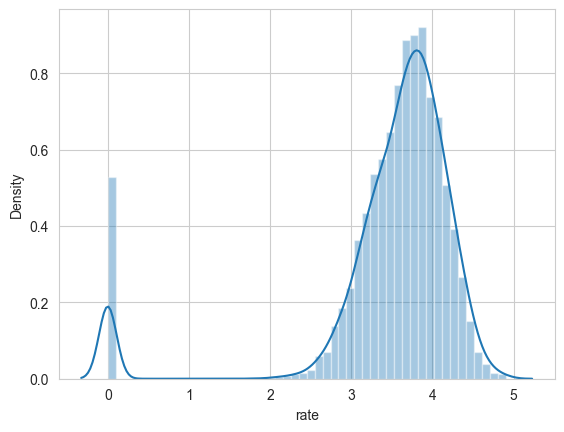

In [27]:
sns.set_style('whitegrid')
sns.distplot(df['rate'])
plt.show

This is a not normal distributionas we can see spike in '0's i.e the new restaurants

**Top restaurant chains**

In [28]:
df['name'].value_counts()

name
Cafe Coffee Day               89
Onesta                        85
Empire Restaurant             71
Just Bake                     68
Five Star Chicken             68
                              ..
SV Food Garden                 1
Ginger restaurant              1
Darjeeling Hot Momos           1
Sri Annapoorna Andhra Mess     1
SeeYa Restaurant               1
Name: count, Length: 7162, dtype: int64

C:\Users\DELL\AppData\Local\Temp\ipykernel_3168\2449026960.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=chains,y=chains.index,palette = 'deep')


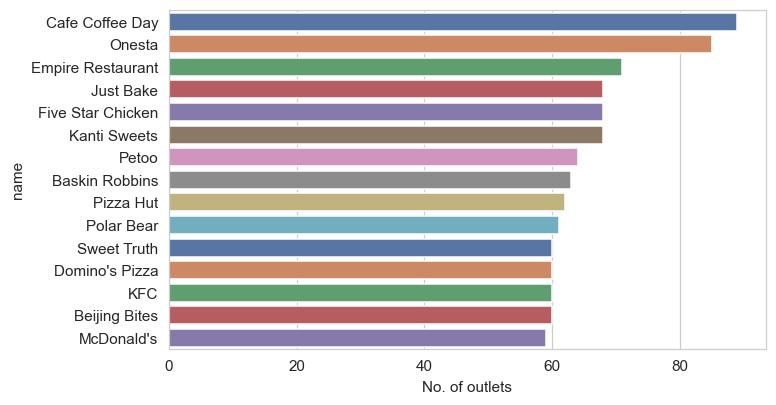

In [29]:
plt.figure(figsize=(7,4),dpi=110)
chains = df['name'].value_counts()[0:15]
sns.barplot(x=chains,y=chains.index,palette = 'deep')
plt.xlabel("No. of outlets")
plt.show()

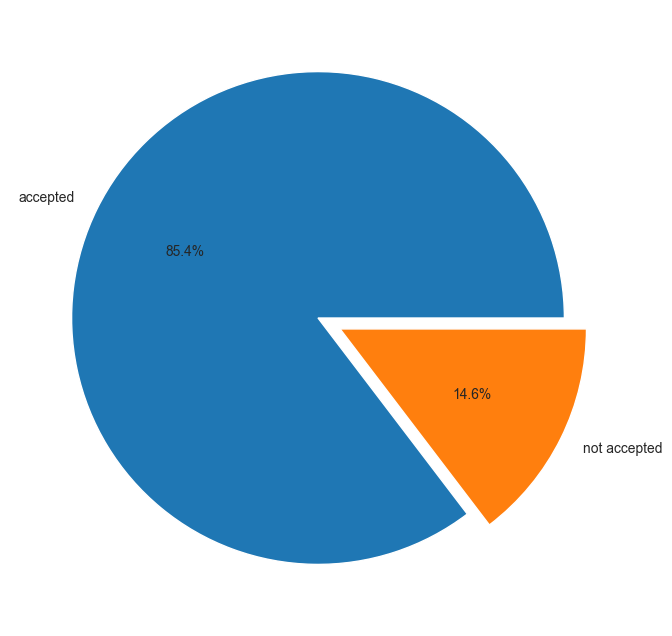

In [30]:
# Count the number of restaurants with and without booking tables
x =df.book_table.value_counts()
labels = ['accepted','not accepted']
plt.figure(figsize=(8,8))
plt.pie(x,labels=labels,explode=[0.0,0.1],autopct='%1.1f%%')
plt.show()

**Interpretation:** The chart will visually depict the proportion of restaurants that offer booking capabilities versus those that don't.  Restaurants can use booking data to: Improve table turnover, Manage wait times, Reduce no-shows. Businesses can identify underserved niches (e.g., high-demand areas with few bookable options) or target specific customer segments who value booking capabilities.

**Analysis of type of restaurants**

In [31]:
Rest_type = df.rest_type.unique()
len(Rest_type)

88

In [32]:
Rest_type = df.rest_type.unique()
Rest_type

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Dessert Parlor, Sweet Shop', 'Bakery, Quick Bites',
       'Sweet Shop, Quick Bites', 'Kiosk', 'Food Truck',
       'Quick Bites, Dessert Parlor', 'Beverage Shop, Quick Bites',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Microbrewery, Casual Dining', 'Lounge',
       'Bar, Casual Dining', 'Food Court', 'Cafe, Bakery', nan, 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Quick Bites, Beverage Shop',
       'Pub, Bar', 'Casual Dining, Pub', 'Lounge, Bar',
       'Dessert Parlor, Quick Bites', 'Food Co

In [33]:
# Find the most common restaurant type
most_common_restaurant_type = df['rest_type'].mode()[0]

# Display the result
print("Most Common Restaurant Type:", most_common_restaurant_type)

Most Common Restaurant Type: Quick Bites


**Interpretation:** The most common restaurant type likely reflects general preferences or trends in the area or dataset.This information can guide decisions about menu offerings, restaurant concepts, or locations. It can serve as a starting point for deeper exploration of customer preferences and market segmentation.

In [34]:
# Most common restaurant types
common_restaurant_types = df['rest_type'].value_counts()
print("Insight 3: Most common restaurant types:")
print(common_restaurant_types)

Insight 3: Most common restaurant types:
rest_type
Quick Bites                   15073
Casual Dining                  9923
Cafe                           3527
Dessert Parlor                 1939
Delivery                       1791
                              ...  
Bakery, Food Court                2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Dessert Parlor, Kiosk             2
Quick Bites, Kiosk                1
Name: count, Length: 87, dtype: int64


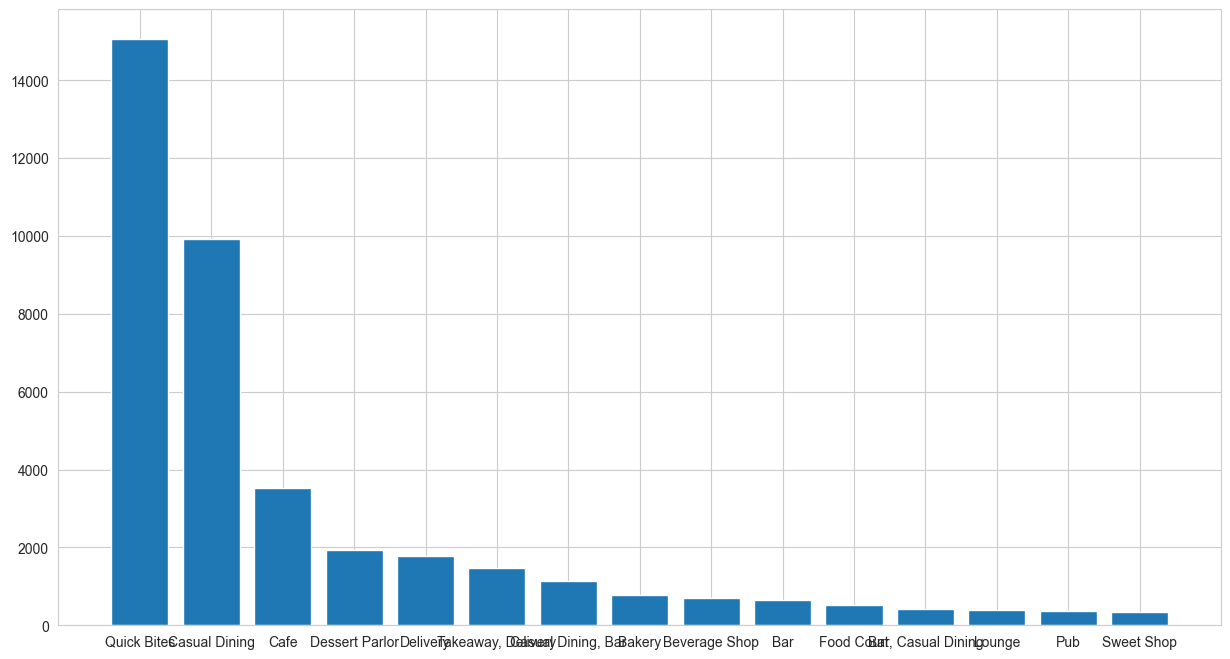

In [35]:
plt.figure(figsize=(15,8))
rest_type = df.rest_type.value_counts()[0:15]
plt.bar(rest_type.index,rest_type)
plt.show()

This is the distribution of type of restaurants and we observe that Quick bites at the top...further this is the dataset of banglore city so most of the people living there perfer quick bites(fast food chains)

**Which restaurant had the highest voting? (means count of rating given)**

In [36]:
voting = df.groupby('name')[['votes']].mean()
voting

,votes
name,
#FeelTheROLL,7.000000
#L-81 Cafe,48.000000
#refuel,37.000000
1000 B.C,49.000000
100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C,41.000000
...,...
i-Bar - The Park Bangalore,619.727273
iFruit Live Ice Creams,10.000000
iSpice Resto Cafe,30.142857


In [37]:
voting = df.groupby('name')['votes'].mean().nlargest(5)
print(voting)

name
Byg Brewski Brewing Company    16588.500000
Toit                           14956.000000
The Black Pearl                 9562.333333
Big Pitcher                     9164.500000
Arbor Brewing Company           8396.545455
Name: votes, dtype: float64


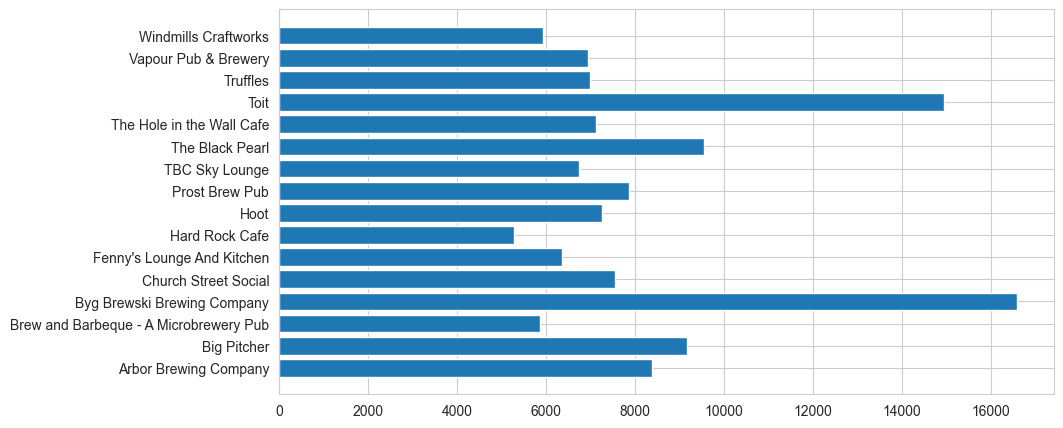

In [ ]:
high_vote = voting[voting['votes']>5000]
plt.figure(figsize=(10,5),dpi=100)
plt.barh(high_vote.index,high_vote['votes'])
plt.show()

**This is a barplot for the count of ratings given by the consumers to a particular restaurants.**

**Let's analyse the highest rated restaurant and worst rated restaurants based on the number of ratings given**

C:\Users\DELL\AppData\Local\Temp\ipykernel_16032\2632998860.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['votes'])


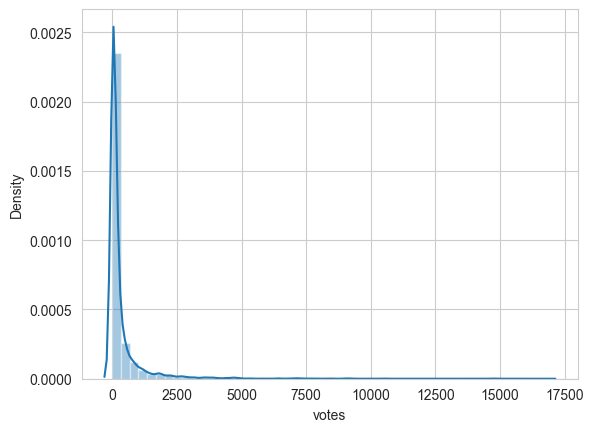

In [ ]:
sns.distplot(df['votes'])
plt.show()

In [ ]:
voting_rating = df.groupby('name')[['votes']].mean().sort_values('votes',ascending=0)
voting_rating

,votes
name,
Byg Brewski Brewing Company,16588.500000
Toit,14956.000000
The Black Pearl,9562.333333
Big Pitcher,9164.500000
Arbor Brewing Company,8396.545455
...,...
NutriFit,0.000000
Cross Roads Inn,0.000000
Crown Resto,0.000000


In [ ]:
voting_rating['name'] = voting_rating.index

In [ ]:
voting_rating  = voting_rating.reset_index(drop=True)
voting_rating.head()

,votes,name
0,16588.500000,Byg Brewski Brewing Company
1,14956.000000,Toit
2,9562.333333,The Black Pearl
3,9164.500000,Big Pitcher
4,8396.545455,Arbor Brewing Company


In [ ]:
voting_rating = pd.merge(voting_rating,df[['rate','name']])
voting_rating

,votes,name,rate
0,16588.5,Byg Brewski Brewing Company,4.9
1,16588.5,Byg Brewski Brewing Company,4.9
2,16588.5,Byg Brewski Brewing Company,4.9
3,16588.5,Byg Brewski Brewing Company,4.9
4,16588.5,Byg Brewski Brewing Company,4.9
...,...,...,...
43937,0.0,Lazzet Lee,0.0
43938,0.0,Lazzet Lee,0.0
43939,0.0,Lazzet Lee,0.0
43940,0.0,Lazzet Lee,0.0


In [ ]:
vote_top =voting_rating[voting_rating['votes']>5000]
vote_top.head()

,votes,name,rate
0,16588.5,Byg Brewski Brewing Company,4.9
1,16588.5,Byg Brewski Brewing Company,4.9
2,16588.5,Byg Brewski Brewing Company,4.9
3,16588.5,Byg Brewski Brewing Company,4.9
4,16588.5,Byg Brewski Brewing Company,4.9


In [ ]:
vote_top = vote_top.groupby('name')[['rate']].mean().sort_values('rate',ascending=0)
vote_top

,rate
name,
Byg Brewski Brewing Company,4.900000
The Black Pearl,4.727778
TBC Sky Lounge,4.700000
Toit,4.700000
Big Pitcher,4.650000
Brew and Barbeque - A Microbrewery Pub,4.620000
The Hole in the Wall Cafe,4.600000
Windmills Craftworks,4.600000
Truffles,4.595349


**highest rate based on most number of votes**

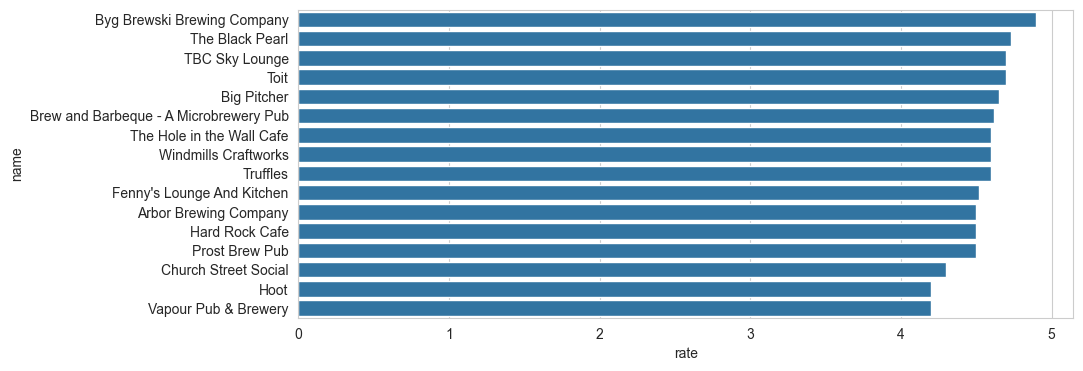

In [ ]:
plt.figure(figsize = (10,4),dpi=100)
sns.barplot(x=vote_top['rate'],y=vote_top.index,orient='h')
plt.show()

**'Byg Brewski Brewing Comapny' is the most voted restaurant with the average rating of 4.9**

In [ ]:
bad_count = voting_rating[(voting_rating['rate']<3) & (voting_rating['rate'] > 0)]
bad_count

,votes,name,rate
3725,967.681818,Kritunga Restaurant,2.6
3726,967.681818,Kritunga Restaurant,2.9
3727,967.681818,Kritunga Restaurant,2.9
3742,967.681818,Kritunga Restaurant,2.7
3743,967.681818,Kritunga Restaurant,2.7
...,...,...,...
42110,4.000000,Special Biriyani,2.9
42111,4.000000,Special Biriyani,2.9
42198,4.000000,Sandesh Restaurant,2.9
42311,2.500000,Kushi Meals,2.8


**Location in which have highest number of restaurants**

In [ ]:
location_restro = df[['location']].value_counts()[0:15]
location_restro

location             
BTM                      4261
Koramangala 5th Block    2381
HSR                      2128
Indiranagar              1936
JP Nagar                 1849
Jayanagar                1718
Whitefield               1693
Marathahalli             1503
Bannerghatta Road        1324
Koramangala 6th Block    1111
Koramangala 7th Block    1089
Brigade Road             1084
Bellandur                1078
Koramangala 1st Block     965
Electronic City           964
Name: count, dtype: int64

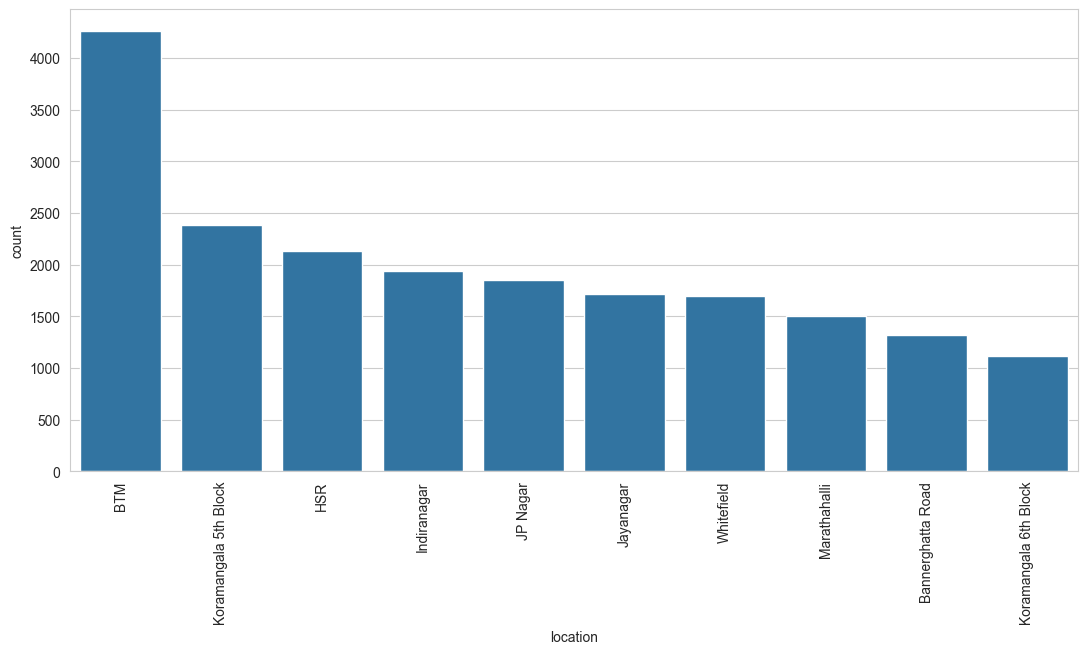

In [43]:
plt.figure(figsize=(13, 6))
sns.countplot(data=df, x='location', order=df['location'].value_counts().index[:10])
plt.xticks(rotation=90)
plt.show()

In [45]:
# Convert 'approx_cost(for two people)' to numeric
df['approx_cost(for two people)'] = pd.to_numeric(df['approx_cost(for two people)'], errors='coerce')

# Group by 'location' and calculate the mean
avg_cost_by_location = df.groupby('location')['approx_cost(for two people)'].mean().sort_values(ascending=False).head(5)

# Print the result
print("Average cost for two people in different locations:")
print(avg_cost_by_location)

Average cost for two people in different locations:
location
Rajarajeshwari Nagar    725.000000
Race Course Road        683.050847
Infantry Road           651.428571
Sankey Road             600.000000
Church Street           561.620795
Name: approx_cost(for two people), dtype: float64


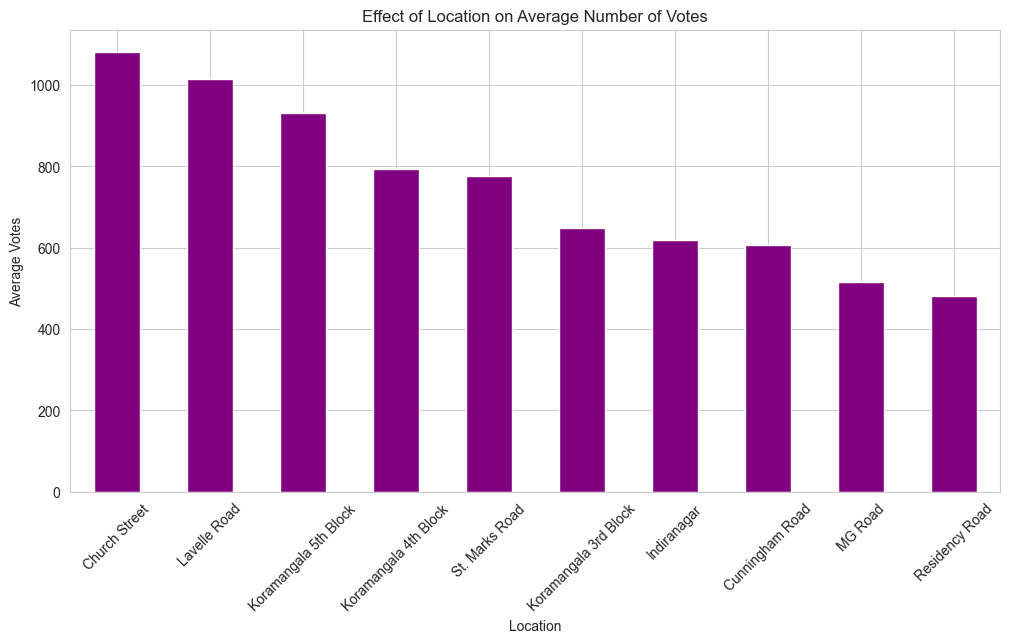

In [ ]:
# Insight: Effect of location on the number of votes
avg_votes_by_location = df.groupby('location')['votes'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
avg_votes_by_location.plot(kind='bar', color='purple')
plt.title('Effect of Location on Average Number of Votes')
plt.xlabel('Location')
plt.ylabel('Average Votes')
plt.xticks(rotation=45)
plt.show()

**Interpretation:** The chart will reveal which locations have the highest average ratings, suggesting potential relationships between location and popularity. Businesses can use this information to: Target expansion or marketing efforts in areas with high average ratings, Investigate factors contributing to popularity in those locations, Understand customer preferences and expectations in different areas, Optimize restaurant placement and strategies based on location insights.

**Identify the top 10 cuisines**

cuisines
North Indian                           2294
North Indian, Chinese                  2060
South Indian                           1320
Cafe                                    653
Bakery, Desserts                        644
Biryani                                 641
South Indian, North Indian, Chinese     601
Fast Food                               580
Desserts                                572
Chinese                                 449
Name: count, dtype: int64


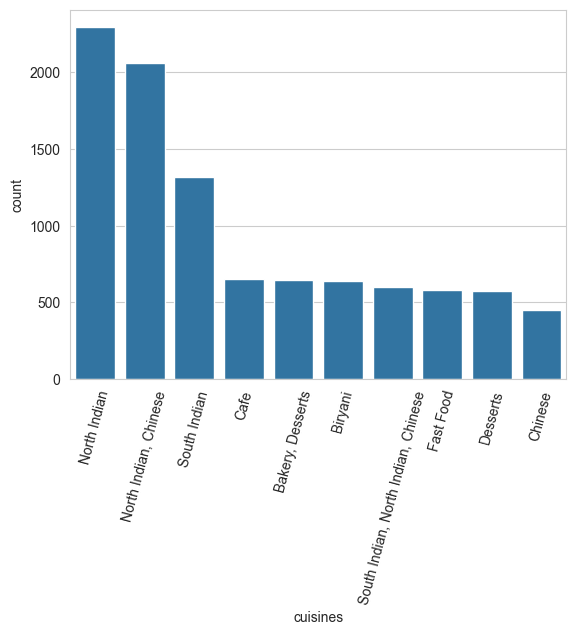

In [ ]:
cusin = df.cuisines.value_counts()[0:10]
print(cusin)
sns.barplot(x=cusin.index,y=cusin)
plt.xticks(rotation=75)
plt.show()

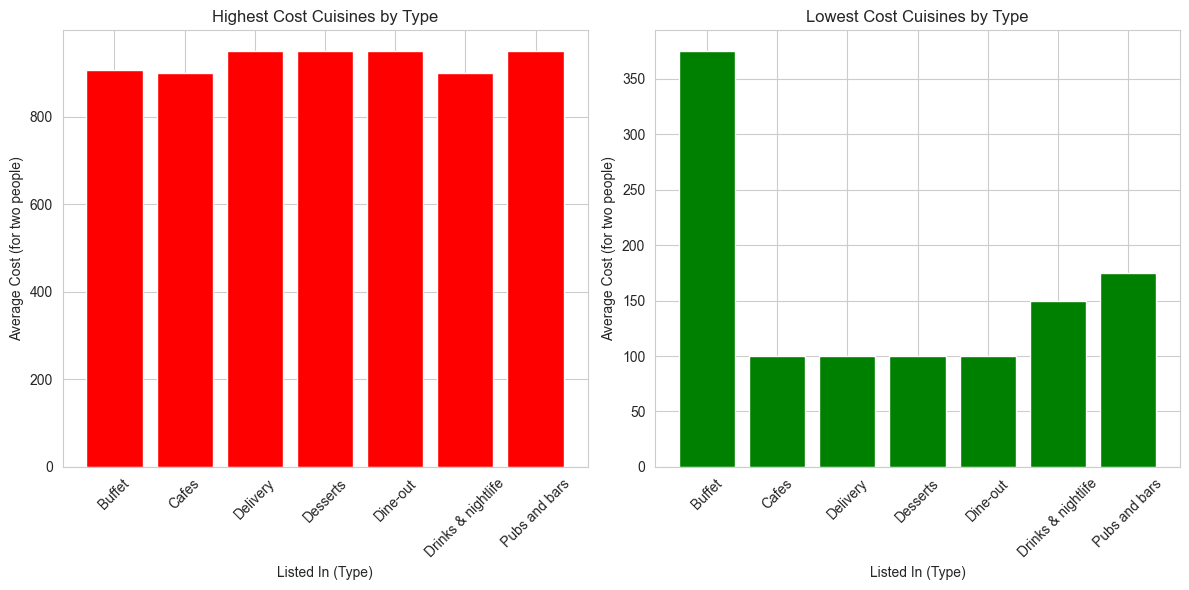

In [ ]:
df['approx_cost(for two people)'] = pd.to_numeric(df['approx_cost(for two people)'], errors='coerce')

avg_cost_by_type = df.groupby(['listed_in(type)', 'cuisines'])['approx_cost(for two people)'].mean().reset_index()

highest_cost_cuisine = avg_cost_by_type.loc[avg_cost_by_type.groupby('listed_in(type)')['approx_cost(for two people)'].idxmax()]
lowest_cost_cuisine = avg_cost_by_type.loc[avg_cost_by_type.groupby('listed_in(type)')['approx_cost(for two people)'].idxmin()]
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(highest_cost_cuisine['listed_in(type)'], highest_cost_cuisine['approx_cost(for two people)'], color='red')
plt.title('Highest Cost Cuisines by Type')
plt.xlabel('Listed In (Type)')
plt.ylabel('Average Cost (for two people)')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.bar(lowest_cost_cuisine['listed_in(type)'], lowest_cost_cuisine['approx_cost(for two people)'], color='green')
plt.title('Lowest Cost Cuisines by Type')
plt.xlabel('Listed In (Type)')
plt.ylabel('Average Cost (for two people)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**Check the distribution for cost of 2 people**

In [ ]:
df['approx_cost(for two people)'].isna().sum()

252

In [ ]:
df.dropna(axis = 0,subset=['approx_cost(for two people)'], inplace = True)

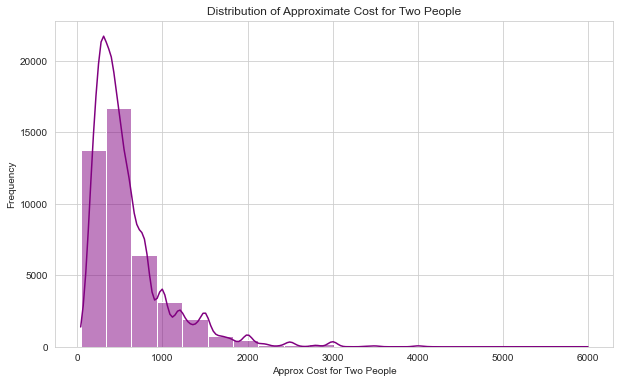

In [ ]:
# Distribution of approximate cost for two people
plt.figure(figsize=(10, 6))
sns.histplot(df['approx_cost(for two people)'].dropna(), bins=20, kde=True, color='purple')
plt.title('Distribution of Approximate Cost for Two People')
plt.xlabel('Approx Cost for Two People')
plt.ylabel('Frequency')
plt.show()

**Interpretation:** The chart will show the shape of the distribution, revealing: Common price ranges, Concentrations of restaurants at certain price points, Potential gaps or opportunities in the market. Businesses can use this information to: Target marketing or promotions based on price sensitivity, Inform menu pricing strategie, Identify opportunities for niche pricing or value offerings, Understand customer expectations and spending patterns.

In [ ]:
df[df['approx_cost(for two people)'] < 2000]

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet
...,...,...,...,...,...,...,...,...,...,...,...
51708,Keys Cafe - Keys Hotel,No,No,2.8,161,Whitefield,"Casual Dining, Bar","Salads, Coffee, Breakfast Buffet, Halwa, Chick...","Chinese, Continental, North Indian",1200.0,Pubs and bars
51709,The Farm House Bar n Grill,No,No,3.7,34,Whitefield,"Casual Dining, Bar",NaN,"North Indian, Continental",800.0,Pubs and bars
51711,Bhagini,No,No,2.5,81,Whitefield,"Casual Dining, Bar","Biryani, Andhra Meal","Andhra, South Indian, Chinese, North Indian",800.0,Pubs and bars
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,Whitefield,Bar,NaN,Continental,1500.0,Pubs and bars


**Most liked dishes**

In [ ]:
most_liked_dishes = df['dish_liked'].str.split(', ').explode().value_counts().head(5)
print("Insight 9: Most liked dishes:")
print(most_liked_dishes)

Insight 9: Most liked dishes:
Pasta        3375
Burgers      3001
Cocktails    2805
Pizza        2696
Biryani      2077
Name: dish_liked, dtype: int64


**Concucion**

**1. Asia kitchen By Mainland China, Spa Cuisine, Byg Brewski Brewing Company, Punjab Grill were the best rated restaurants.**


**2. Cafe Coffee Day, Onesta, Empire Restaurant, Just Bake, Kanti sweets were the top restaurant chains.**

**3. 64.4% of restaurants accepts online orders where 35.6% don't accept online orders.**


**4.Based on most voted restaurants Byg Brewski Brewing Company and The Black Pearl were the best raetd restaurants.**

**5.Based on most voted restaurnats Lazeez and Tandoor Hut were the most worst rated restaurants.**

**6. BTM, Koramangala 5th Block has the most numbers of restaurants.**

**7. North Indian and Chinese were the top favourite of the people in Banglore.**

**8. Cost for 2 people for the most restaurants was varing from 500 to 1000 bucks.**